In [2]:
import json


with open('/data/home/chenpz/git_clone_project/nlpData/p3/anli_r3_json_file/anli_r3_test.json', 'r', encoding='utf-8') as f:
    data = json.load(f)



In [3]:
label = []
for i in data:
    label.append(i['output'].replace(" ",""))

In [5]:
predict = []
for cp in [40,60]:
    predict = []
    with open(f'/data/home/chenpz/git_clone_project/LLaMA-Factory/saves/llama3_anli_r3/test_predict_result/anli_r3_train_kcg_HighIFD_first5000~10000_data_gas=5_lr=5e-5_cp{cp}.txt', 'r', encoding='utf-8') as f:
        for line in f:
            predict.append(line.strip()) 

    k=0

    for i in range(len(label)):
        if predict[i] == label[i]:
            k+=1
    print(k/len(predict))

0.5641666666666667
0.5558333333333333


# mistral

In [ ]:
# kcg0.54
## epoch 3
{'fps_last_5000':0.5275, 'fps_first_5000':0.58, 'fps_random_5000': 0.53}
## epoch 4
{'fps_last_5000':0.546, 'fps_first_5000':0.60, 'fps_random_5000': 0.56}

# ppl high or low

In [ ]:
# setting 5gpu gas=1 lr=1e-5
# epoch2
{'kcg_last_5000': 0.343}
# epoch3
{'kcg_last_5000': 0.385}
#epoch4
{'kcg_last_5000': 0.416}

# lr = 5e-5
0.54
0.563
0.55



# setting 5gpu gas=5 lr=5e-5
# epoch3
{'ppl_high_5000': 0.486, 'ppl_low_5000': 0.509, 'random':0.636, 'kcg_first_5000':0.616 ,'kcg_last_5000':0.60, 'kcg_median':0.619, 'kcg_last_5000_shift1000':0.615}
# epoch4
{'ppl_high_5000': 0.4783, 'ppl_low_5000': 0.515, 'random':0.63, 'kcg_first_5000':0.63  ,'kcg_last_5000':0.62, 'kcg_median':0.619, 'kcg_last_5000_shift1000':0.62}
# epoch5
{'ppl_high_5000': 0.493, 'ppl_low_5000': 0.518, 'random':0.629, 'kcg_first_5000':0.630,'kcg_last_5000':0.618, 'kcg_median':0.619, 'kcg_last_5000_shift1000':0.616}

# remain_highest_ppl_notall_gas=5_lr=5e-5
0.487, 0.493, 0.494
# last5000 shuffle_gas=5_lr=5e-5
0.624, 0.625, 0.620
# last5000 shuffle_gas=5_lr=5e-5 seed 1024
0.628, 0.624, 0.6216
# mix last and first5000 gas=5_lr=5e-5 3epoch
0.6425
# add high ppl to first5000 gas=5_lr=5e-5
0.621, 0.633

# lr = 1e-4 last5000 ep3~5
0.584
0.6125
0.599

# lr = 1e-4 random
0.629
0.6275
0.619

# lr = 1e-4 first5000 ffp
0.648
0.654
0.6541

# lr = 1e-4 first5000 seed=1024
0.635, 
0.6458, 
0.6525

# lr = 1e-4 high ppl 5000
0.466
0.47
0.47

# lr = 1e-4 low ppl 5000
0.49
0.501
0.505

# lr = 1e-4 remain high ppl not all
0.438, 
0.49, 
0.47

# lr = 1e-4 reomve high ppl from last5000
0.5783333333333334
0.6041666666666666
0.6116666666666667

# lr = 1e-4 add high ppl to first5000
0.618, 0.619, 0.613
# mix last and first5000 gas=5_lr=1e-4 2epoch
0.65

# setting 5gpu gas=10 too much! Need to reduce the gas size
# epoch3
{'kcg_last_5000':0.41}
{'kcg_last_5000':0.36}


# fps 比较

In [ ]:
# epoch 3
{'fps_last_5000':0.639, 'fps_first_5000':0.6125}
# epoch 4
{'fps_last_5000':0.648,"fps_first_5000":0.615}

# kcg 比较

In [ ]:
# epoch 3
{'kcg_last_1000~6000':0.636, 'kcg_last_5000':0.62, 'kcg_first_5000':0.63, 'random_5000': 0.608,'mediem_5000': 0.615}
# {'kcg_last_5000_loss':, 'kcg_first_5000_loss':, 'random_5000_loss':,'mediem_5000_loss':}

# epoch 4
{'kcg_last_1000~6000':0.630,'kcg_last_5000':0.63, 'kcg_first_5000':0.634, 'random_5000': 0.626 ,'mediem_5000': 0.625}

In [ ]:
import numpy as np
x = []
y = []
# 从 JSON 文件读取数据
with open('/data/home/chenpz/git_clone_project/jupyter_notebook_test/output/anli_r3_loss_FFP_all.jsonl', 'r', encoding='utf-8') as json_file:
    for line in json_file:
        line = line.strip().replace("'", '"')
        data = json.loads(line)
        x.append(data['id'])
        y.append(data['loss'])

import pickle
with open('/data/home/chenpz/git_clone_project/jupyter_notebook_test/output/kcenters_rank_fromFarPoint.pkl', 'rb') as f:
    res1 = pickle.load(f)
with open('/data/home/chenpz/git_clone_project/jupyter_notebook_test/output/anli_r3_kcg_seed1024.pkl', 'rb') as f:
    res2 = pickle.load(f)

index_dict = {value: idx for idx, value in enumerate(res1[0])}

# 2. 按照 res2 的顺序重新排列 y
loss_list = []
loss_list.append( [y[index_dict[value]] for value in res2] )

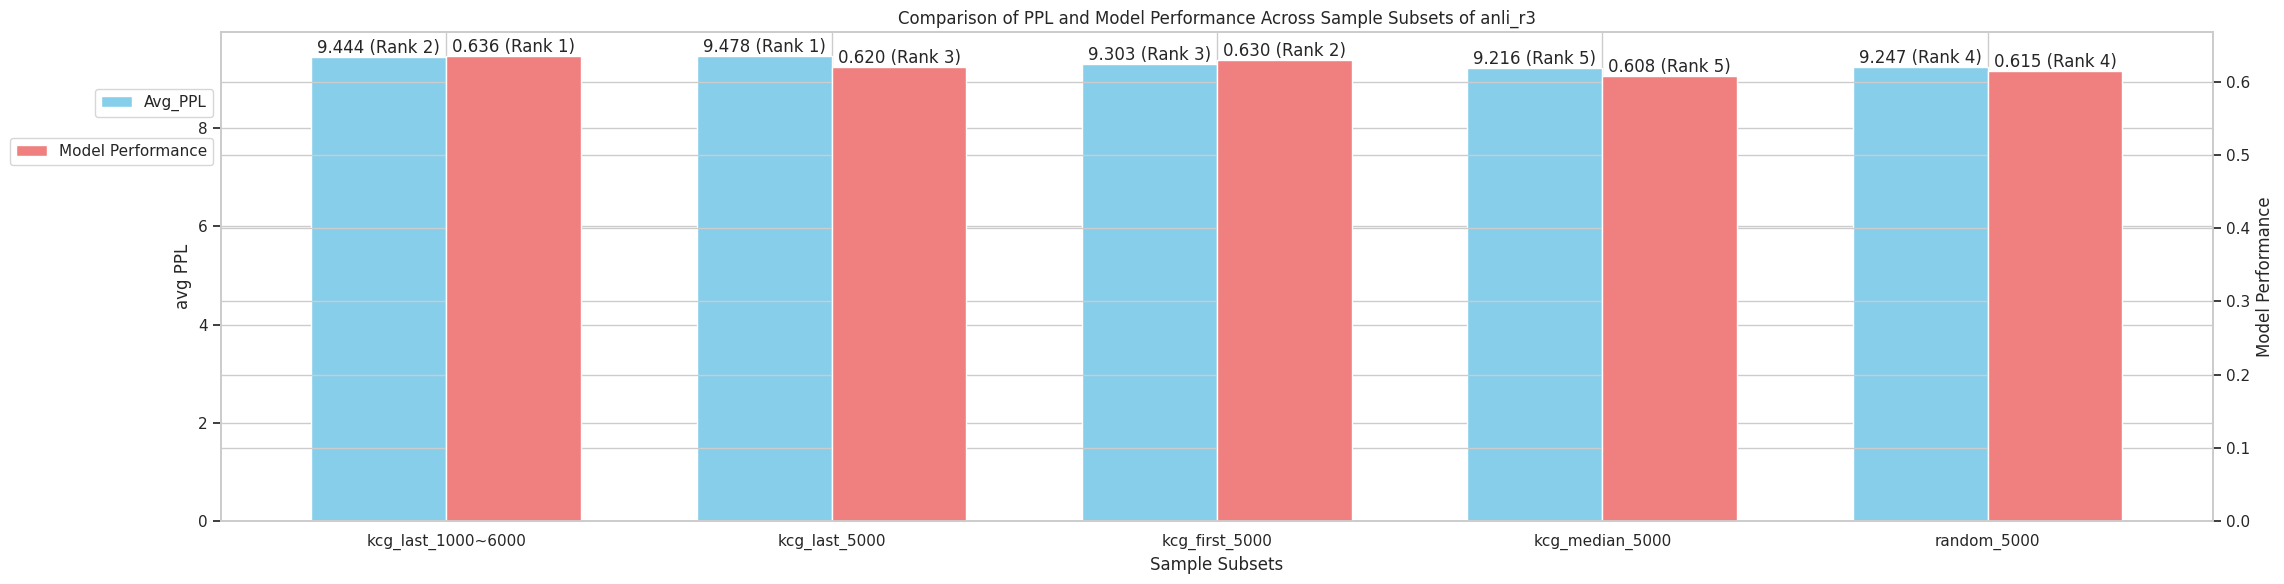

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json

x = []
y = []
# 从 JSON 文件读取数据
with open('/data/home/chenpz/git_clone_project/jupyter_notebook_test/output/anli_r3_loss_FFP_all.jsonl', 'r', encoding='utf-8') as json_file:
    for line in json_file:
        line = line.strip().replace("'", '"')
        data = json.loads(line)
        x.append(data['id'])
        y.append(data['loss'])



# 模拟数据
subset_names = ['kcg_last_1000~6000', 'kcg_last_5000', 'kcg_first_5000', 'kcg_median_5000', 'random_5000']
ppl_values = [np.mean(y[-6000:-1000]), np.mean(y[-5000:]), np.mean(y[:5000]), np.mean(y[50000:55000]), np.mean(y)] # Perplexity 值 (PPL)
performance_values = np.array([0.636, 0.62, 0.63, 0.608, 0.615])  # 假设的模型性能（例如，accuracy）

# 设置图形风格
sns.set(style="whitegrid")

# 计算排名 (降序)
ppl_ranks = [sorted(ppl_values, reverse=True).index(x) + 1 for x in ppl_values]
performance_ranks = [sorted(performance_values, reverse=True).index(x) + 1 for x in performance_values]

# 设置图形风格
sns.set(style="whitegrid")

# 创建一个图形和一对子图
fig, ax1 = plt.subplots(figsize=(23, 6))

# 绘制 PPL 柱状图
bar_width = 0.35
index = range(len(subset_names))

bar1 = ax1.bar(index, ppl_values, bar_width, label='Avg_PPL', color='skyblue')

# 在柱子上显示具体数值和排名，保留3位小数
for i, bar in enumerate(bar1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f} (Rank {ppl_ranks[i]})', ha='center', va='bottom')

# 设置第二个y轴
ax2 = ax1.twinx()

# 绘制模型性能柱状图
bar2 = ax2.bar([i + bar_width for i in index], performance_values, bar_width, 
               label='Model Performance', color='lightcoral')

# 在柱子上显示具体数值和排名，保留3位小数
for i, bar in enumerate(bar2):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f} (Rank {performance_ranks[i]})', ha='center', va='bottom')

# 设置轴标签和标题
ax1.set_xlabel('Sample Subsets')
ax1.set_ylabel('avg PPL')
ax2.set_ylabel('Model Performance')
ax1.set_title('Comparison of PPL and Model Performance Across Sample Subsets of anli_r3')

# 设置x轴的刻度
ax1.set_xticks([i + bar_width/2 for i in index])
ax1.set_xticklabels(subset_names)

# 图例
ax1.legend(loc='upper right',bbox_to_anchor=(0,0.9))
ax2.legend(loc='upper right',bbox_to_anchor=(0,0.8))

# 显示图表
plt.tight_layout()
plt.show()


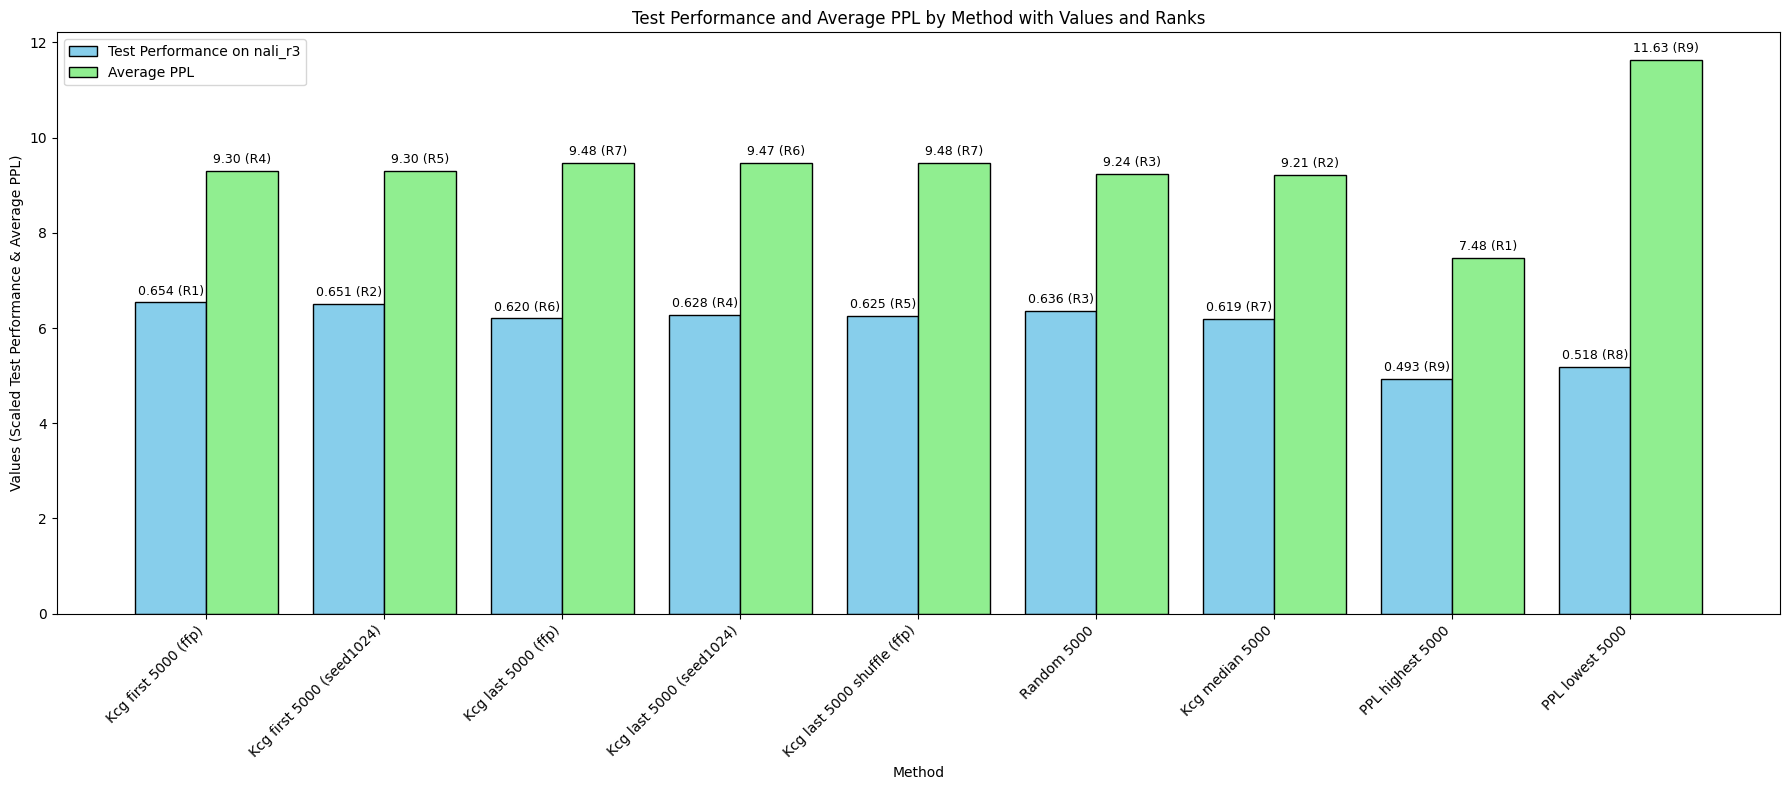

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 初始化数据
methods = [
    "Kcg first 5000 (ffp)", "Kcg first 5000 (seed1024)", "Kcg last 5000 (ffp)", 
    "Kcg last 5000 (seed1024)", "Kcg last 5000 shuffle (ffp)", "Random 5000", 
    "Kcg median 5000", "PPL highest 5000", "PPL lowest 5000"
]
test_performance = [0.654, 0.651, 0.62, 0.628, 0.625, 0.636, 0.619, 0.493, 0.518]
average_ppl = [9.302, 9.304, 9.477, 9.473, 9.477, 9.24, 9.21, 7.48, 11.63]

# 计算排名
data = pd.DataFrame({
    "Method": methods,
    "Test Performance": test_performance,
    "Average PPL": average_ppl
})
data["Test Performance Rank"] = data["Test Performance"].rank(ascending=False).astype(int)
data["Average PPL Rank"] = data["Average PPL"].rank(ascending=True).astype(int)

# 获取排名
test_performance_ranks = data["Test Performance Rank"].tolist()
average_ppl_ranks = data["Average PPL Rank"].tolist()

# 绘图设置
bar_width = 0.4
indices = np.arange(len(methods))

fig, ax = plt.subplots(figsize=(18, 8))

# 绘制柱状图
test_performance_scaled = [x * 10 for x in test_performance]  # 放大测试性能值
ax.bar(indices - bar_width/2, test_performance_scaled, width=bar_width, color='skyblue', edgecolor='black', label="Test Performance on nali_r3")
ax.bar(indices + bar_width/2, average_ppl, width=bar_width, color='lightgreen', edgecolor='black', label="Average PPL")

# 添加数值和排名标签
for i, (tp, ppl, tp_rank, ppl_rank) in enumerate(zip(test_performance_scaled, average_ppl, test_performance_ranks, average_ppl_ranks)):
    ax.text(i - bar_width/2, tp + 0.1, f'{test_performance[i]:.3f} (R{tp_rank})', ha='center', va='bottom', fontsize=9, color='black')
    ax.text(i + bar_width/2, ppl + 0.1, f'{average_ppl[i]:.2f} (R{ppl_rank})', ha='center', va='bottom', fontsize=9, color='black')

# 设置标签和标题
ax.set_xlabel("Method")
ax.set_ylabel("Values (Scaled Test Performance & Average PPL)")
ax.set_title("Test Performance and Average PPL by Method with Values and Ranks")
ax.set_xticks(indices)
ax.set_xticklabels(methods, rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()


In [77]:
sort_y = sorted(y)

np.mean(sort_y[:5000]), np.mean(sort_y[-5000:])

(7.484609794998169, 11.634144786071777)

# version1

In [ ]:
{
# sim1 
'5000_random_cp31':0.525,
'5000_random_cp42':0.576,
'5000_random_cp52':0.603,
'5000_random_cp60':0.596,

# sim2


#seed 3244
'5000_cp30':0.54, 
'5000_cp21':0.396,
'5000_cp31':0.56,
'5000_cp42':0.5975,
'5000_cp52':0.57,
#seed 1024
'5000_seed1024_cp31':0.5375,
'5000_seed1024_cp42':0.5725,
'5000_seed1024_cp52':0.5916,
'5000_seed1024_cp60':0.5883,
#seed 1024 shift 50
'5000_seed1024_cp42_shift50':0.5775,
'5000_seed1024_cp52_shift50':0.59,
'5000_seed1024_cp60_shift50':0.595,

# '5000_cp20_far':0.468,
# '5000_cp31_far':0.54,
# '5000_cp42_far':0.589,
# '5000_cp52_far':0.6008,
# '5000_cp63_far':0.604,
# '5000_cp73_far':0.586,
# '5000_cp100_far':0.581,


'4600_cp48_far':0.5775,
'4600_cp58_far':0.5875,
'4600_cp58_far':0.586,

'5000_cp42_far':0.579,
'5000_cp52_far':0.5975,
'5000_cp63_far':0.576,

'6000_cp50_far':0.591,
'6000_cp62_far':0.5925,
'6000_cp75_far':0.598,
'6000_cp84_far':0.598,

'5000_cp42_far_shift50':0.5775,
'5000_cp52_far_shift50':0.580,
'5000_cp63_far_shift50':0.57,


'5000_cp52_far_shift50_shuffle':0.5625,
'5000_cp63_far_shift50_shuffle':0.569,

'5000_cp42_far_shift100':0.574,
'5000_cp52_far_shift100':0.59,
'5000_cp63_far_shift100':0.586,
'5000_cp70_far_shift100':0.5875,

'5000_cp52_far_noshuffle':0.5975,

'5000_cp42_far_shuffle':0.5675,
'5000_cp52_far_shuffle':0.588,
'5000_cp63_far_shuffle':0.584,


'50000_ep1_seed1024':0.585,
'50000_ep2_seed1024':0.606,
'50000_leaf_ep1_seed1024':0.616,
'50000_leaf_ep2_seed1024':0.62,
'50000_shuffle_ep1_seed1024':0.6108,
'50000_shuffle_ep2_seed1024':0.623,
'50000_anli_r3_FFP_ep1':0.5975,
'50000_anli_r3_FFP_ep2':0.5975,
'full':0.6, 
'10000_ep2_seed1024_without_random':0.56, 
'10000_ep1_seed3224_without_random':0.47}